<a href="https://colab.research.google.com/github/AsheryMbilinyi/hackzurich/blob/master/theme_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
!ls gdrive/My\ Drive/Vontobel

 azure			        sustainability.csv
 evaluation_data	        sustainability.gsheet
 evaluation.md		        theme_prediction.ipynb
 evaluation.pdf		        theme_predictions.ipynb
 hack_train.db		       'Vontobel - Predict answer_category.ipynb'
 hack_train.md		       'Vontobel - Predict sustainability_score.ipynb'
 hack_train.pdf		        workshop_summary.gdoc
 industry_rating_criteria.PNG   workshop_summary.pdf
 news.csv


### dataset

In [0]:
import os
import pandas as pd
data = os.path.join("gdrive/My Drive/Vontobel/news.csv")
#movie_data = os.path.join( "gdrive/My\ Drive/research/research2.0/projects/mkali/mazoezi/movie_data.csv")

In [0]:
data = pd.read_csv(data)

In [7]:
data.head()

,id,company,country,sector,theme,event_indicator_name,answer_category,number_incidents_in_chain,incident_title,incident_type,publication_date,source,description,location,incident_date
0,0,3i Group PLC,United Kingdom,Consumer Discretionary,Social,Social Impact of Products,Category 1,2,Action offers remedy participants of 2015 job ...,NewsUpdate,16/03/2017,Company feedback,"3i, which manages 75% of the shares of Dutch r...",Belgium,15/03/2017
1,1,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,2,Airservices find high levels of chemicals in a...,InitialIncident,31/07/2018,ABC News,The Airservices Australia tested 150 firefight...,Australia,31/07/2018
2,2,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,2,Sydney aquifer contaminated with toxic chemicals,IncidentUpdate,23/12/2018,Sydney Morning Herald,Australian media outlets disclosed that the aq...,"Sydney NSW, Australia",23/12/2018
3,3,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,1,Alabama seeks to fine 3M for violating the lim...,InitialIncident,20/02/2017,Decatur Daily,The Alabama Department of Environmental Manage...,United States,20/02/2017
4,4,3M Co,United States,Consumer Discretionary,Social,Quality and Safety,Category 3,1,Alleged faults at the company's electronic ank...,InitialIncident,6/4/2017,Bloomberg,3M Company has come under scrutiny for alleged...,United States,6/4/2017


## **50 most frequently words in the news descriptions**

In [8]:
import nltk
from nltk.tokenize import word_tokenize
descriptions = data.description.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(descriptions)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

47704


['the',
 '.',
 ',',
 'to',
 'and',
 'of',
 'in',
 'a',
 'that',
 'The',
 'for',
 '’',
 '(',
 ')',
 'by',
 's',
 'was',
 'company',
 'with',
 'USD',
 'its',
 'it',
 'on',
 'lawsuit',
 'from',
 'million',
 'an',
 'not',
 'were',
 'as',
 'filed',
 'stated',
 'against',
 'companies',
 'According',
 'at',
 'which',
 'is',
 'US',
 'after',
 "'s",
 'their',
 'investigation',
 'including',
 'also',
 'report',
 '2017',
 'alleged',
 'between',
 'claimed']

## **removing the stop words**

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

# **Visualization of the most frequent words in the news descriptions**

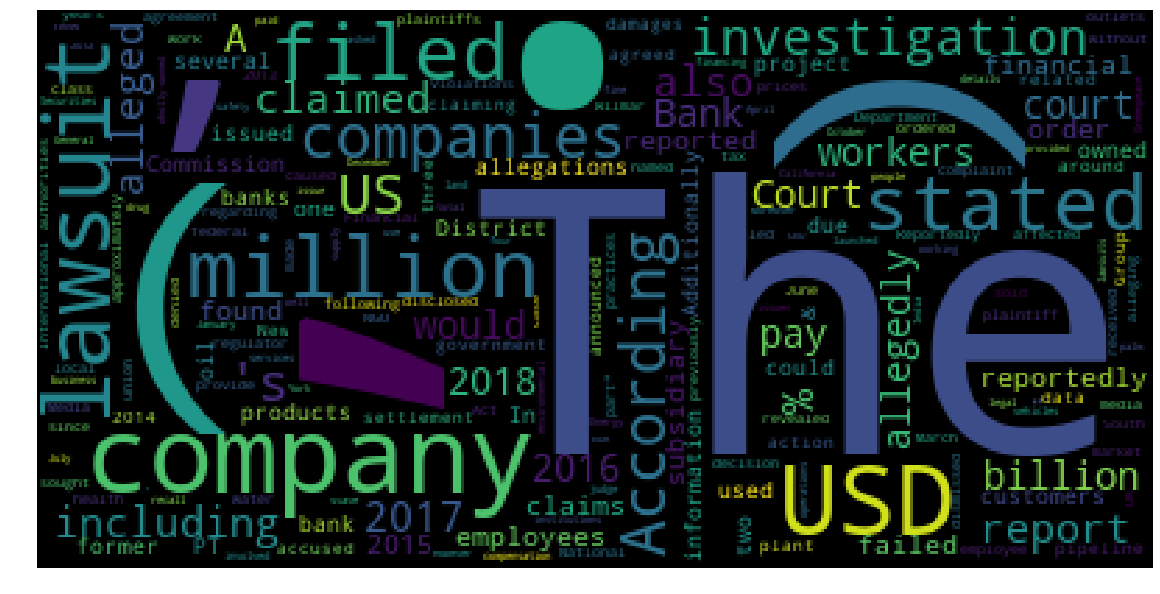

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 14), dpi=80, facecolor='w', edgecolor='k')


frequency_dist = nltk.FreqDist(tokens)
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
features = data.description.values
labels = data.theme.values

# **Encoding the labels**

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
le = encoder.fit(labels)
labels = le.transform(labels)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size =0.20,random_state = 2)

# **Term Frequency Representations**

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(16732, 33671) (4183, 33671)


# **Naive Bayes Classifier to predict the them based on news description**

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [16]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.7967965574946211


# **Various Classifiers based on news TFIDF Representation**

In [17]:

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import make_scorer
import numpy as np

acc_score = make_scorer(accuracy_score)



#Model 0 - Random Forest Classifier
model_rf = RandomForestClassifier()
    
model_rf.fit(train_vectors, y_train)
model_rf_accuracy = accuracy_score(y_test, model_rf.predict(test_vectors))
feature_importances_rf = model_rf.feature_importances_

#Model 2 - XGBoost Classifier
#def xgboost(X_train,X_test,y_train,y_test,useTrainCV=True,cv_folds=5,early_stopping_rounds = 50):


model_xgboost = XGBClassifier()
model_xgboost.fit(train_vectors,y_train)
model_xgboost_accuracy = accuracy_score(y_test, model_xgboost.predict(test_vectors))
feature_importances_xgboost = model_xgboost.feature_importances_
  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
model_accuracies = [model_rf_accuracy, model_xgboost_accuracy]
model_results = pd.DataFrame(
    {"Algorithm":["RF",
                  "XGBoost",
                 ],
    "Accuracy": model_accuracies})

model_results

,Algorithm,Accuracy
0,RF,0.877600
1,XGBoost,0.843892
